In [2]:
import sys
assert sys.version_info >= (3, 6), "This script requires Python 3.6 or higher."

import sklearn
assert sklearn.__version__ >= "0.24", "This script requires scikit-learn version 0.24 or higher."

import numpy as np
import os

np.random.seed(42)

%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib as mpl
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

PROJECT_ROOT_DIR = "."
CHAPTER_ID = "classification"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID)
os.makedirs(IMAGES_PATH, exist_ok=True)

### MNIST

**Warning**: `fech_openml()` returns Pandas `DataFrame` by default. To avoid this and keep the same code as in the book, we use `as_frame=False`.

In [3]:
from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784', version=1, as_frame=False)
mnist.keys()

dict_keys(['data', 'target', 'frame', 'categories', 'feature_names', 'target_names', 'DESCR', 'details', 'url'])

In [4]:
X, y = mnist["data"], mnist["target"]
X.shape, y.shape

((70000, 784), (70000,))

In [5]:
28 * 28

784

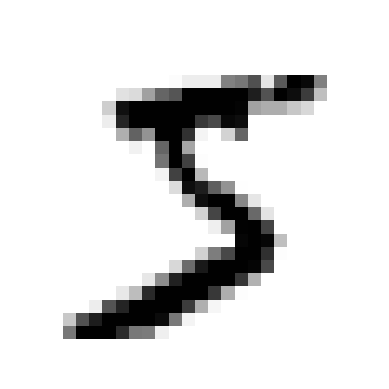

In [6]:
%matplotlib inline

import matplotlib.pyplot as plt
import matplotlib as mpl

some_digit = X[0]
some_digit_image = some_digit.reshape(28, 28)
plt.imshow(some_digit_image, cmap=mpl.cm.binary, interpolation="nearest")
plt.axis("off")

plt.show()

In [8]:
y[0]

'5'

In [9]:
y = y.astype(np.uint8)  # Convert labels to uint8 for consistency

In [10]:
def plot_digit(data):
    image = data.reshape(28, 28)
    plt.imshow(image, cmap=mpl.cm.binary, interpolation="nearest")
    plt.axis("off")

In [11]:
# EXTRA

def plot_digits(instances, images_per_row=10, **options):
    size = 28
    n_rows = (len(instances) - 1) // images_per_row + 1
    image = np.zeros((n_rows * size, images_per_row * size), dtype=np.uint8)
    for index, instance in enumerate(instances):
        row = index // images_per_row
        col = index % images_per_row
        image[row * size:(row + 1) * size, col * size:(col + 1) * size] = instance.reshape(size, size)
    plt.imshow(image, cmap=mpl.cm.binary, **options)
    plt.axis("off")

In [15]:
def plot_digits2(instances, images_per_row=10, **options):
    size = 28
    images_per_row = min(len(instances), images_per_row)
    # This is equivalent to n_rows = cell(len(instances) / images_per_row) + 1
    n_rows = (len(instances) - 1) // images_per_row + 1

    # Append empty images to fill the end of the grid, if Needed:
    n_empty = n_rows * images_per_row - len(instances)
    padded_instances = np.concatenate([instances, np.zeros((n_empty, size * size))], axis=0)

    # Reshape the array so it's organized as a grid containing 28x28 images:
    images_grid = padded_instances.reshape((n_rows, images_per_row, size, size))

    # Combine axes 0 and 2 (vertical image grid axis, and vertical images axis),
    # and axes 1 and 3 (horizontal axes). We first need to move the axes that we
    # want to combine next to each other, using transpose(), and only then we can reshape:
    big_image = images_grid.transpose(0, 2, 1, 3).reshape(n_rows * size, images_per_row * size)

    # Now that we have a big image, we just need to show it:
    plt.imshow(big_image, cmap=mpl.cm.binary, **options)
    plt.axis("off")

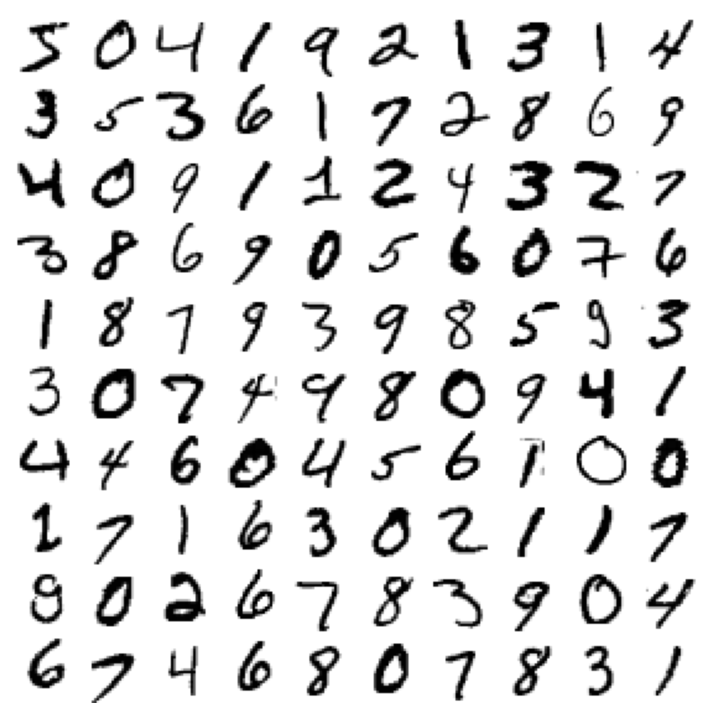

In [16]:
plt.figure(figsize=(9, 9))
example_iamges = X[:100]
plot_digits(example_iamges, images_per_row=10)
plt.show()

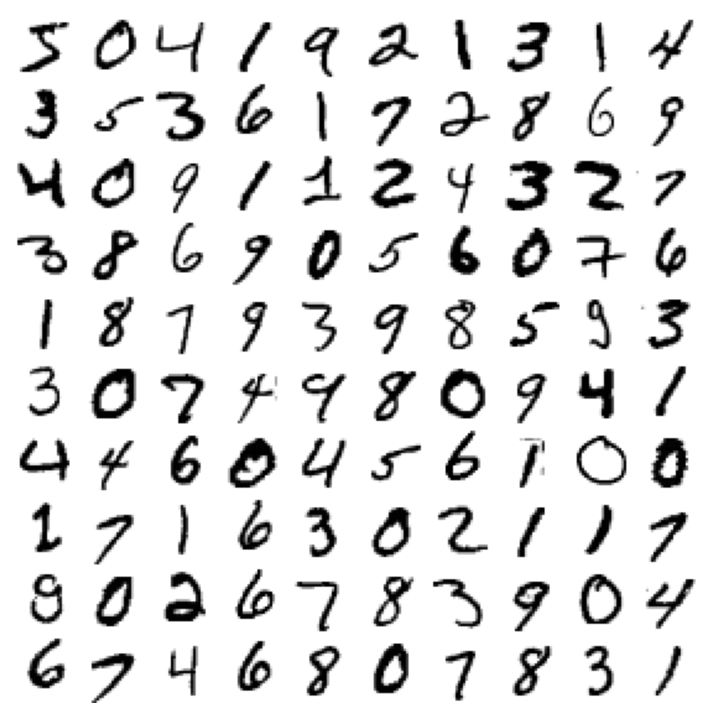

In [17]:
plt.figure(figsize=(9, 9))
example_iamges = X[:100]
plot_digits2(example_iamges, images_per_row=10)
plt.show()